 <p style="background:#008000;color:#ffffff; text-align:center;font-size:30px;padding:15px;font-family:Sans-serif"> Recommendation System - Online Course</p>

#### Problem Statement
The goal of this dataset is to build an online course recommendation system that suggests relevant courses to learners based on their interests, past enrollments, and engagement levels. The dataset includes course ratings, instructor information, previous learning history, study material availability, and certification offerings, making it suitable for recommendation models using collaborative filtering, content-based filtering, or hybrid approaches


#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Import required libraries</p>

In [1]:
# pip install openpyxl

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Load Dataset</p>

In [59]:
df = pd.read_excel('online_course_recommendation_v2.xlsx')
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Exploratory Data Analysis (EDA)</p>

In [60]:
print("Dataset Shape : ", df.shape)

Dataset Shape :  (100000, 14)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [62]:
print(df.loc[df['course_name'] == 'AI for Business Leaders', 'course_id'])

52        687
57       2914
71       9819
90        823
97       4429
         ... 
99846    7083
99862    2226
99959    1363
99969    3407
99978    5805
Name: course_id, Length: 5007, dtype: int64


In [63]:
df.iloc[[52, 57, 71, 90, 97]].sample(n=5)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
90,12186,823,AI for Business Leaders,Benjamin Lewis,12.7,Yes,Beginner,5.0,16114,60.56,0.594,Yes,23.39,3
97,48985,4429,AI for Business Leaders,Liam Adams,95.5,No,Intermediate,3.3,30951,150.37,0.617,Yes,22.59,6
52,48556,687,AI for Business Leaders,Alexander Young,40.2,Yes,Intermediate,4.5,33985,250.42,1.000,Yes,25.29,1
71,5676,9819,AI for Business Leaders,Dr. Mia Walker,83.7,Yes,Intermediate,4.3,36609,495.10,0.742,Yes,34.30,8
57,35921,2914,AI for Business Leaders,Daniel White,79.5,Yes,Beginner,5.0,5112,487.39,0.611,Yes,1.12,6


In [64]:
df['course_id'].value_counts()

course_id
1139    23
3658    23
4335    23
346     22
2501    21
        ..
4233     2
7525     2
8403     2
5636     2
9060     1
Name: count, Length: 9998, dtype: int64

In [65]:
df['course_name'].value_counts()

course_name
Networking and System Administration         5107
Cybersecurity for Professionals              5078
Advanced Machine Learning                    5063
Ethical Hacking Masterclass                  5062
Graphic Design with Canva                    5057
DevOps and Continuous Deployment             5037
Public Speaking Mastery                      5028
Mobile App Development with Swift            5024
Stock Market and Trading Strategies          5022
Data Visualization with Tableau              5010
AI for Business Leaders                      5007
Photography and Video Editing                4995
Project Management Fundamentals              4981
Blockchain and Decentralized Applications    4972
Fundamentals of Digital Marketing            4965
Personal Finance and Wealth Building         4933
Python for Beginners                         4931
Cloud Computing Essentials                   4926
Fitness and Nutrition Coaching               4903
Game Development with Unity           

In [66]:
df['rating'].value_counts()

rating
5.0    11868
4.0     5101
4.1     4986
3.9     4883
3.8     4860
4.2     4724
4.3     4683
3.7     4664
4.4     4492
3.6     4357
4.5     4101
3.5     4028
3.4     3707
4.6     3692
3.3     3419
4.7     3397
4.8     3022
3.2     3007
3.1     2608
4.9     2572
3.0     2244
2.9     1915
2.8     1640
2.7     1384
2.6     1112
2.5      899
2.4      686
2.3      492
2.2      414
2.1      310
2.0      204
1.9      186
1.8       98
1.7       74
1.6       51
1.5       41
1.4       29
1.3       22
1.0       10
1.2        9
1.1        9
Name: count, dtype: int64

In [67]:
## Finding unique Course ID
print(df.course_id.unique())
len(df.course_id.unique())

[9366 1928 9541 ... 4445 4004 5636]


9998

In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
## Finding unique learners
print(df.user_id.unique())
len(df.user_id.unique())

[15796   861 38159 ... 14669 49654 12929]


43242

In [70]:
## Finding unique Instructors
print(df.instructor.unique())
len(df.instructor.unique())

['Emma Harris' 'Alexander Young' 'Dr. Mia Walker' 'Benjamin Lewis'
 'Daniel White' 'Dr. John Smith' 'Dr. Robert Davis' 'Liam Adams'
 'Prof. Emily Johnson' 'Isabella Scott' 'Charlotte King' 'Sarah Lee'
 'Sophia Anderson' 'James Clark' 'Ethan Hall' 'Olivia Taylor'
 'Michael Brown' 'William Thomas' 'Jessica Martinez' 'David Wilson']


20

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Handeling missing values</p> 

In [71]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Most of the users rated the course with 5 star rating.
* There are around 9998 unique courses. 
* No duplicate records
* Around 43242 learners / Users and 20 instructors
* The dataset does not have any of the missing values
* The datatypes for all the features is appropriate.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Dataset Summary</p>  

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,24935.663570,14406.960108,1.000,12487.750,24793.50,37382.2500,49999.00
course_id,100000.0,5006.863560,2882.085456,1.000,2523.000,5012.00,7502.0000,9999.00
course_duration_hours,100000.0,52.383540,27.423470,5.000,28.600,52.40,76.1000,100.00
rating,100000.0,3.959859,0.729958,1.000,3.500,4.00,4.5000,5.00
enrollment_numbers,100000.0,25052.822850,14388.188356,50.000,12583.750,25057.50,37522.0000,49999.00
course_price,100000.0,261.073369,139.013758,20.000,140.100,262.31,381.7025,500.00
feedback_score,100000.0,0.746865,0.143683,0.092,0.649,0.75,0.8510,1.00
time_spent_hours,100000.0,20.691054,13.669148,1.000,9.900,19.92,30.0800,84.15
previous_courses_taken,100000.0,4.992670,2.237259,0.000,3.000,5.00,6.0000,19.00


In [73]:
df.describe(include=object).T

,count,unique,top,freq
course_name,100000,20,Networking and System Administration,5107
instructor,100000,20,Jessica Martinez,5092
certification_offered,100000,2,Yes,70059
difficulty_level,100000,3,Beginner,49877
study_material_available,100000,2,Yes,85147


#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Visualization</p>

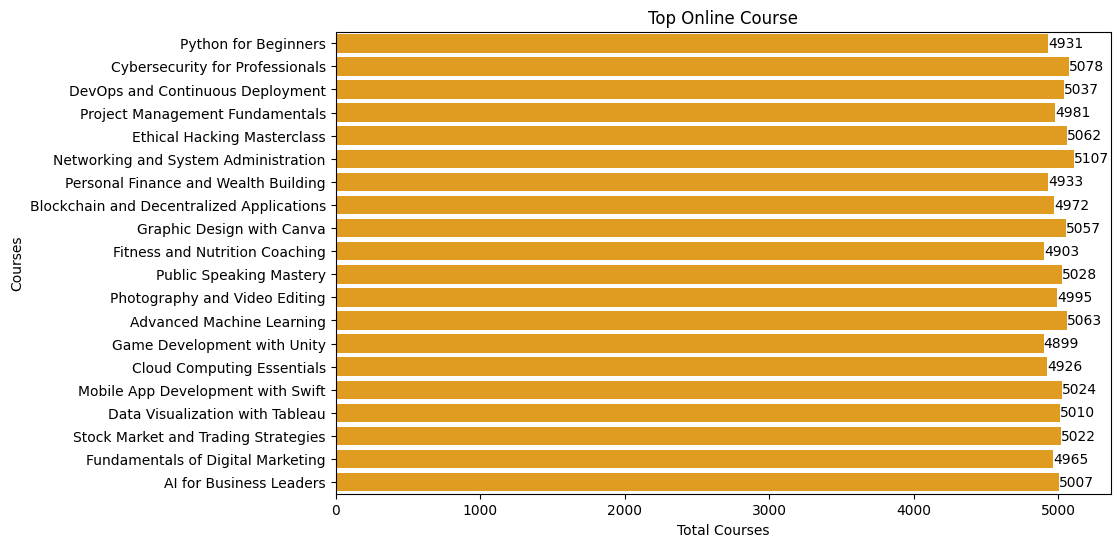

In [74]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y = df['course_name'],color='orange')
ax.bar_label(ax.containers[0])
plt.title("Top Online Course")
plt.xlabel("Total Courses")
plt.ylabel("Courses")
plt.show()

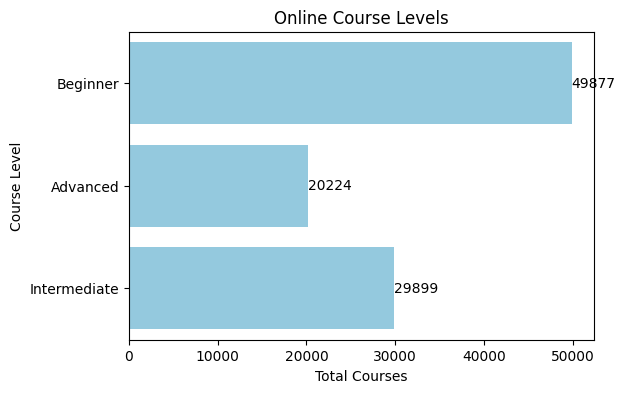

In [75]:
plt.figure(figsize=(6,4))
ax = sns.countplot(y = df['difficulty_level'],color='skyblue')
ax.bar_label(ax.containers[0])
plt.title("Online Course Levels")
plt.xlabel("Total Courses")
plt.ylabel("Course Level")
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Theres are around 49877 courses availbale with beginner level.
* The intermidiate and advanced courses are less as compared to the beginner level
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

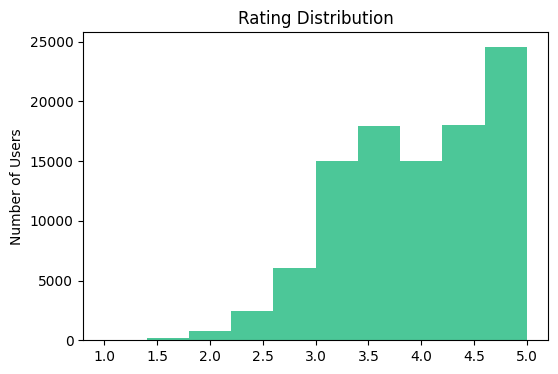

In [76]:
plt.figure(figsize=(6,4))
plt.hist(df['rating'], bins=10,color='#4CC798')
plt.ylabel("Number of Users")
plt.title("Rating Distribution")
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Here we can clearly see the user rating distribution is left skewed / negatvely skewed.
* Most of the courses andd highly rated with around star ratings between 3.5 to 5.0
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

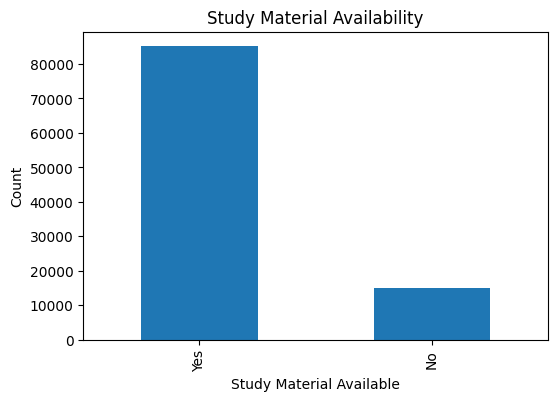

In [77]:
study_material = df['study_material_available'].value_counts()
plt.figure(figsize=(6,4))
study_material.plot(kind='bar')
plt.xlabel("Study Material Available")
plt.ylabel("Count")
plt.title("Study Material Availability")
plt.show()

certification_offered
Yes    70059
No     29941
Name: count, dtype: int64


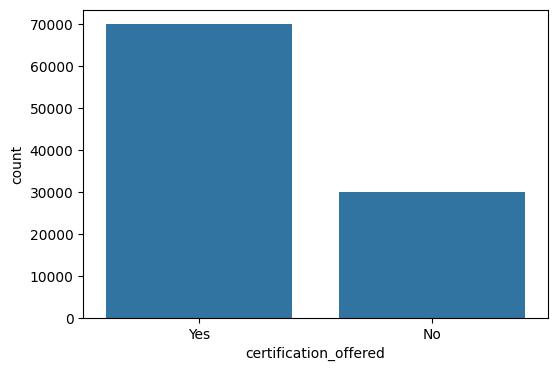

In [78]:
print(df['certification_offered'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=df['certification_offered'], data=df)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Most of the courses provides study meaterial and certificate for courses 
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

In [79]:
top_courses = df.sort_values(['feedback_score'], ascending=False)
top_courses.head(5)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
99950,3033,1155,Photography and Video Editing,Daniel White,38.7,Yes,Beginner,3.0,29606,424.85,1.0,No,49.22,1
24930,30870,4551,Fitness and Nutrition Coaching,Olivia Taylor,32.9,Yes,Advanced,4.1,4692,64.03,1.0,Yes,35.80,6
51955,37065,175,Stock Market and Trading Strategies,James Clark,45.9,No,Intermediate,3.5,38166,318.94,1.0,Yes,17.84,3
51957,13031,8814,AI for Business Leaders,Prof. Emily Johnson,35.8,Yes,Beginner,4.0,29660,412.46,1.0,Yes,22.81,4
89126,28121,4146,AI for Business Leaders,Jessica Martinez,30.6,Yes,Advanced,5.0,20124,42.56,1.0,Yes,17.43,2


In [80]:
top_courses['rating'][:10]

99950    3.0
24930    4.1
51955    3.5
51957    4.0
89126    5.0
51972    4.5
8509     3.8
89113    4.2
8432     3.8
8438     3.6
Name: rating, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_13884\3252303463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_courses, x=top_courses["course_name"][:10],y=top_courses["rating"], palette='viridis')


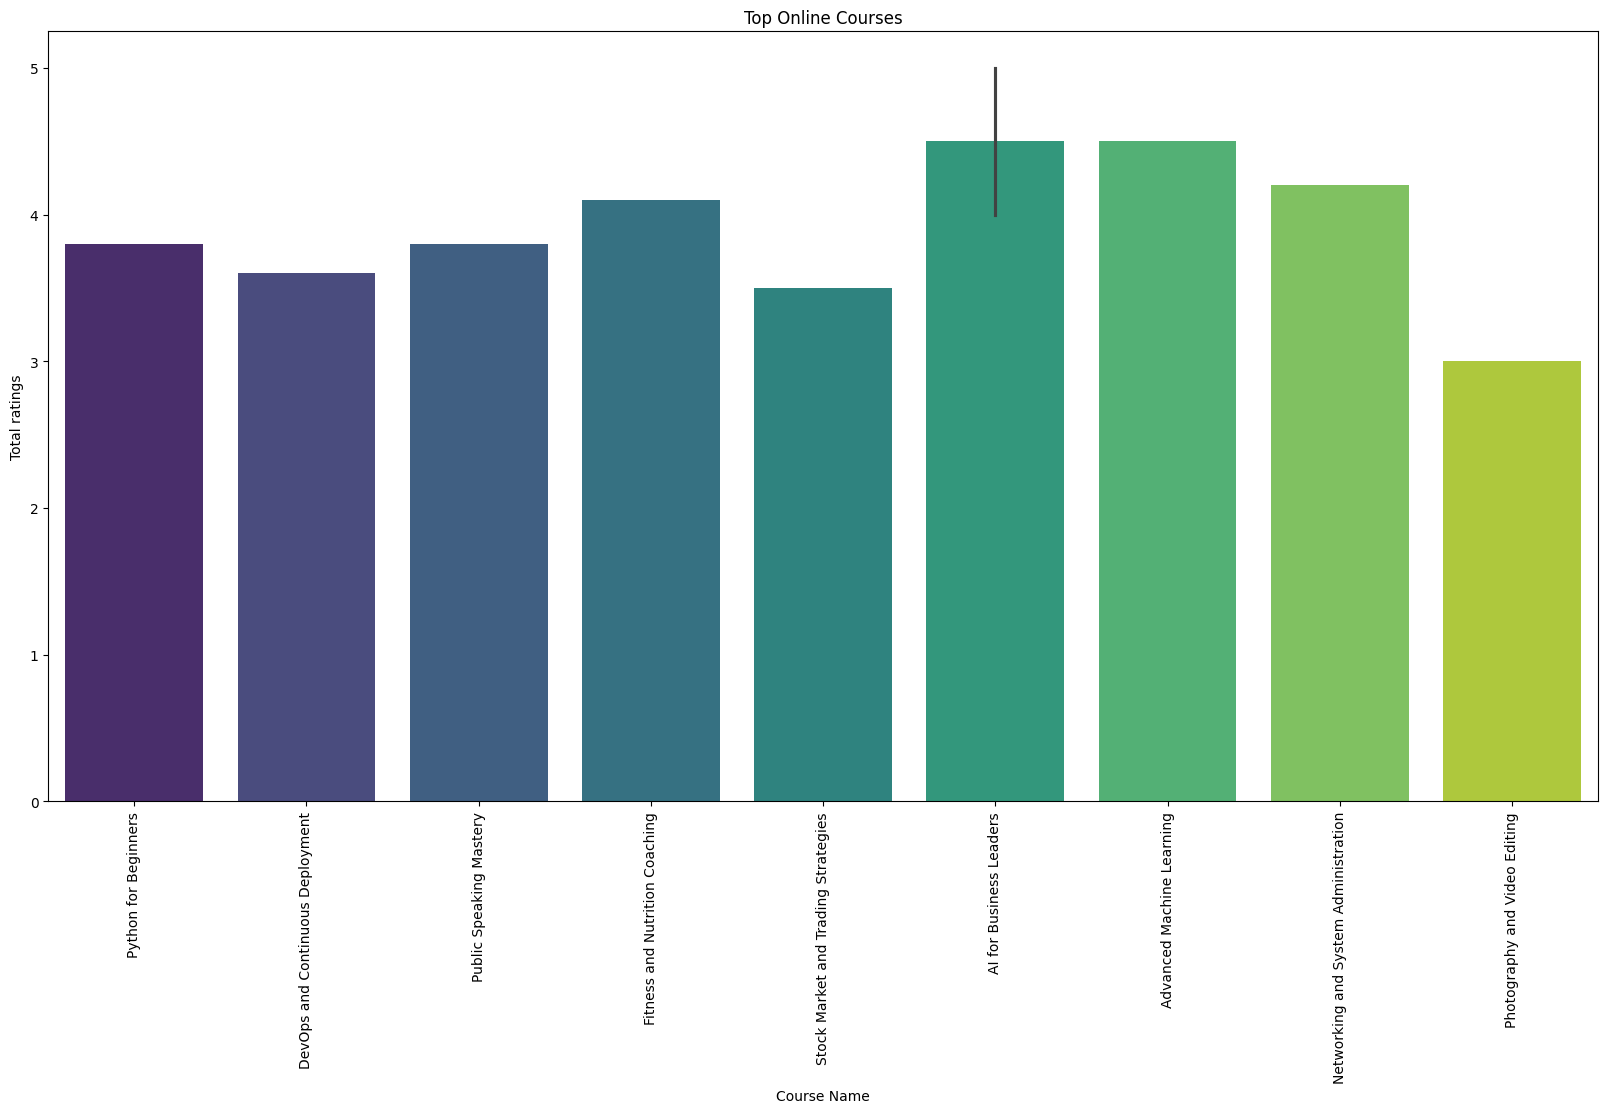

In [81]:
order = top_courses['rating'][:10]
plt.figure(figsize=(20,10))
sns.barplot(data=top_courses, x=top_courses["course_name"][:10],y=top_courses["rating"], palette='viridis')
plt.title("Top Online Courses")
plt.xlabel("Course Name")
plt.ylabel("Total ratings")
plt.xticks(rotation=90)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Sorted with the feedback score,we can see the AI for business leaders and advanced machine learning courses are top online courses with high ratings
* After that Networking and system aministration and Fitness and Nutritian coching are second top online highly rated courses.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### Separting Numerical and Categorical Columns for visualization

In [82]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: Index(['user_id', 'course_id', 'course_duration_hours', 'rating',
       'enrollment_numbers', 'course_price', 'feedback_score',
       'time_spent_hours', 'previous_courses_taken'],
      dtype='object')
Categorical columns: Index(['course_name', 'instructor', 'certification_offered',
       'difficulty_level', 'study_material_available'],
      dtype='object')


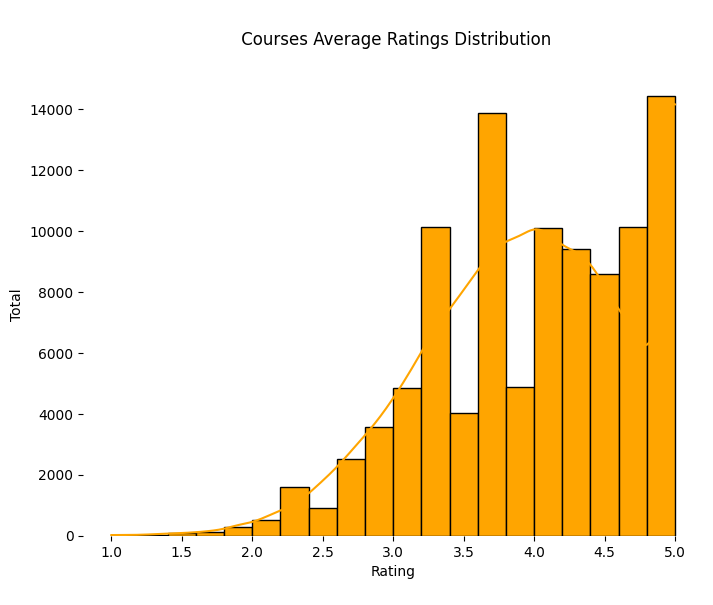

In [83]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=6.0)
top_courses_temp = df.sort_values(['rating'],ascending=False)
sns.histplot(top_courses_temp["rating"],kde=True,bins=20,alpha=1,fill=True,color='orange')
plt.title("\n Courses Average Ratings Distribution\n")
plt.xlabel("Rating\n")
plt.ylabel("Total")
sns.despine(left=True, bottom=True)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* From the histogram, we can see the data is negatively skewed to the left, with the high ratings between 3.5 to 5.0
* Few courses have ratings below 3.0
* The peak of the graph lies between the 4.0 an 4.5
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

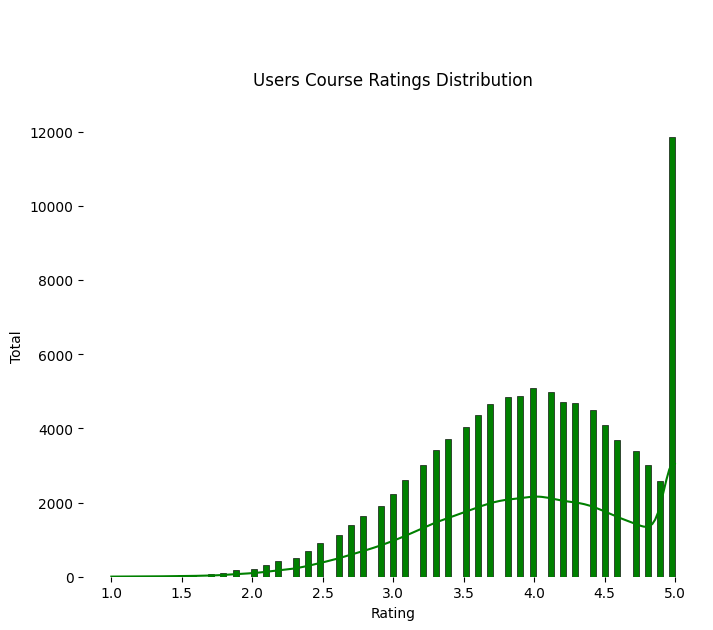

In [84]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=6.0)
sns.histplot(df["rating"],color='green',kde=True,bins="auto",alpha=1,fill=True)
plt.title("\n\n\nUsers Course Ratings Distribution\n")
plt.xlabel("Rating")
plt.ylabel("Total")
sns.despine(left=True, bottom=True)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Here we can clearly see the users course rating disctibutions, approximatly 12000 courses are rated with 5..0 rating which is very high
* Most of the courses rated between te 3.5 and 4.5
* Below 3.0 rating the course number is very less
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Outlier Detection and treatments</p>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'user_id'),
  Text(1, 0, 'course_id'),
  Text(2, 0, 'course_duration_hours'),
  Text(3, 0, 'rating'),
  Text(4, 0, 'enrollment_numbers'),
  Text(5, 0, 'course_price'),
  Text(6, 0, 'feedback_score'),
  Text(7, 0, 'time_spent_hours'),
  Text(8, 0, 'previous_courses_taken')])

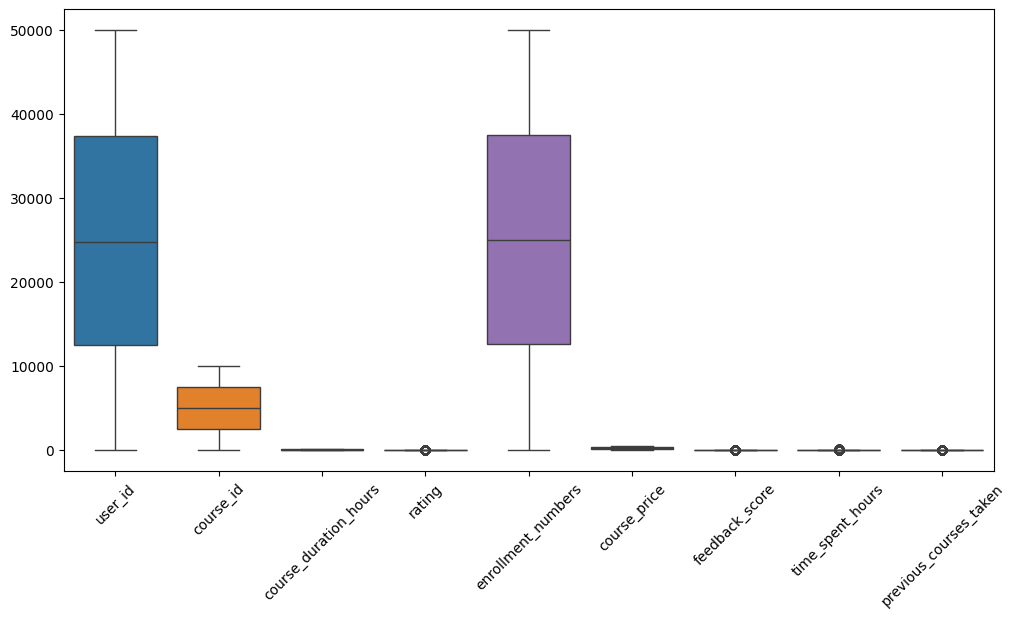

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bdf2c7b200>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdf2c7b770>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf2c7b020>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdf2c7bce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdf2c79cd0>],
 'means': []}

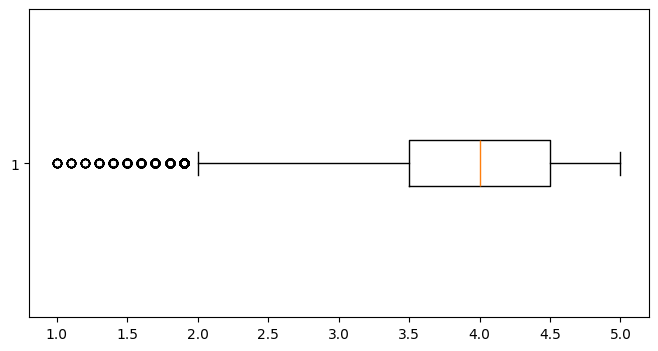

In [86]:
plt.figure(figsize=(8,4))
plt.boxplot(df['rating'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bdf2c12cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdf2c132c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf2c12b70>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdf2c138c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdf2c13bc0>],
 'means': []}

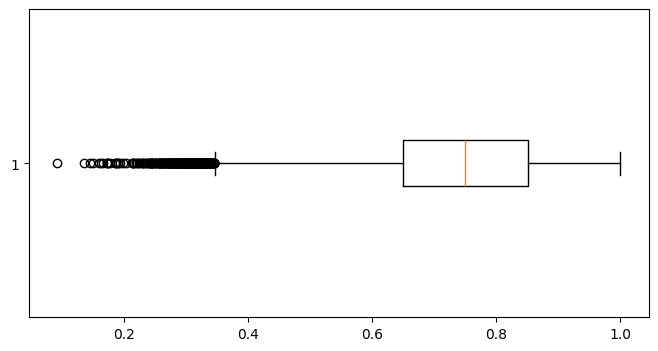

In [87]:
plt.figure(figsize=(8,4))
plt.boxplot(df['feedback_score'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bdf2c80ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdf2c814f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf2c80bf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdf2c819d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdf2c81d00>],
 'means': []}

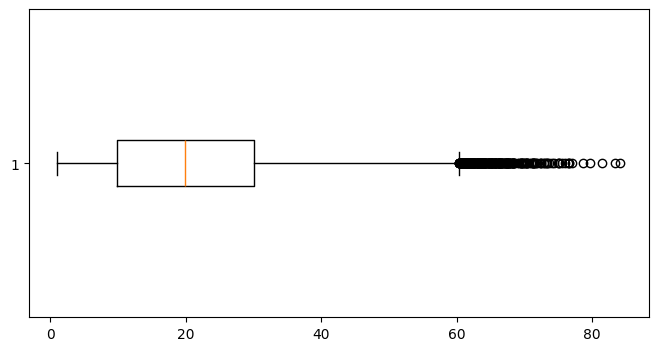

In [88]:
plt.figure(figsize=(8,4))
plt.boxplot(df['time_spent_hours'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd82903200>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd829037d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdf26e2d50>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd82903d70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd828fc080>],
 'means': []}

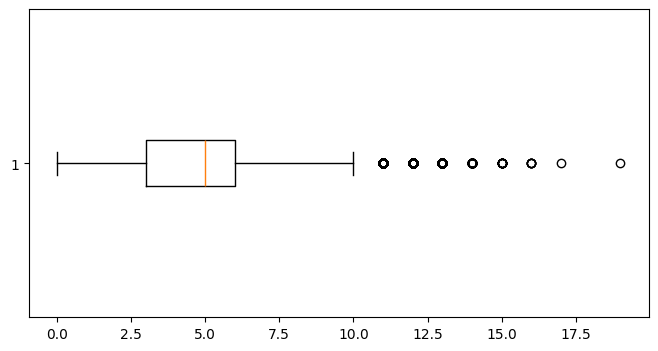

In [89]:
plt.figure(figsize=(8,4))
plt.boxplot(df['previous_courses_taken'],vert=False)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* From the box plot we can clearly see the presence of the outliers in some columns.
* The features rating, feedback_score, time_spent_hours, previous_courses_taken contains the outliers on lower side and upper side.
* We will treat only these columns with IQR method 
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Treating Outliers</p>

In [90]:
def outliers_detection_fixes(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower = Q1 - 1.5 * IQR
        Upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] > Upper, Upper, np.where(df[col] < Lower, Lower, df[col]))
    return df

In [91]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken'],
      dtype='object')

In [92]:
outliers_detection_fixes(df, ['rating','feedback_score','time_spent_hours','previous_courses_taken'])

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4.0
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9.0
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4.0
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6.0
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10647,5466,Graphic Design with Canva,Emma Harris,17.3,Yes,Beginner,3.9,49101,485.34,0.838,Yes,16.35,3.0
99996,13800,2623,Stock Market and Trading Strategies,Dr. John Smith,68.4,Yes,Beginner,3.5,35107,162.80,0.922,Yes,41.94,7.0
99997,47131,1556,Networking and System Administration,Dr. John Smith,73.8,Yes,Beginner,4.3,12146,24.02,0.990,Yes,15.87,5.0
99998,49654,6001,Graphic Design with Canva,Daniel White,30.3,Yes,Beginner,3.5,9933,402.24,0.630,Yes,21.05,4.0


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'user_id'),
  Text(1, 0, 'course_id'),
  Text(2, 0, 'course_duration_hours'),
  Text(3, 0, 'rating'),
  Text(4, 0, 'enrollment_numbers'),
  Text(5, 0, 'course_price'),
  Text(6, 0, 'feedback_score'),
  Text(7, 0, 'time_spent_hours'),
  Text(8, 0, 'previous_courses_taken')])

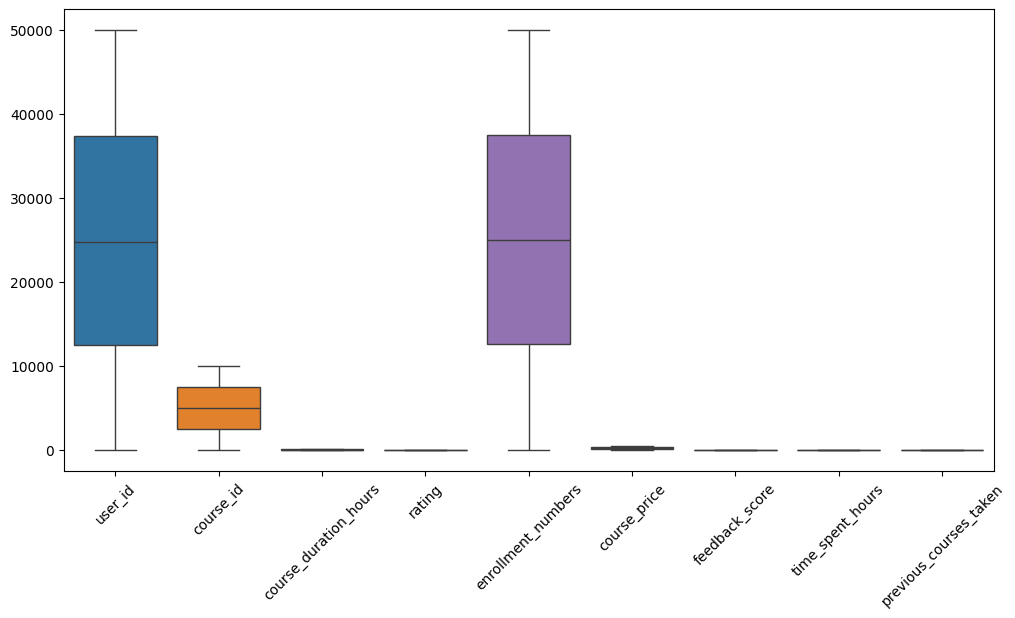

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* After applying IQR we can see the outliers are cleaned, but the range of the data of feature enrollment_number is high and other columns also have different ranges.
* So for preserving reaive differencing we will apply MinMax scaling method for only numerical columns excluding user_id and course_id
* As user_id and course_id are identifier columns not a features.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">


#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Scaling Data</p>

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
num_cols = [
    'course_duration_hours',
    'enrollment_numbers',
    'course_price',
    'time_spent_hours',
    'previous_courses_taken'
]

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [96]:
df['enrollment_numbers'] = np.log1p(df['enrollment_numbers'])

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,24935.663570,14406.960108,1.000,12487.750000,24793.500000,37382.250000,49999.000000
course_id,100000.0,5006.863560,2882.085456,1.000,2523.000000,5012.000000,7502.000000,9999.000000
course_duration_hours,100000.0,0.498774,0.288668,0.000,0.248421,0.498947,0.748421,1.000000
rating,100000.0,3.961453,0.725146,2.000,3.500000,4.000000,4.500000,5.000000
enrollment_numbers,100000.0,0.386767,0.197241,0.000,0.223888,0.405905,0.559733,0.693147
course_price,100000.0,0.502236,0.289612,0.000,0.250208,0.504812,0.753547,1.000000
feedback_score,100000.0,0.747038,0.143148,0.346,0.649000,0.750000,0.851000,1.000000
time_spent_hours,100000.0,0.331516,0.229468,0.000,0.149958,0.318787,0.489975,1.000000
previous_courses_taken,100000.0,0.474008,0.208725,0.000,0.285714,0.476190,0.571429,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'user_id'),
  Text(1, 0, 'course_id'),
  Text(2, 0, 'course_duration_hours'),
  Text(3, 0, 'rating'),
  Text(4, 0, 'enrollment_numbers'),
  Text(5, 0, 'course_price'),
  Text(6, 0, 'feedback_score'),
  Text(7, 0, 'time_spent_hours'),
  Text(8, 0, 'previous_courses_taken')])

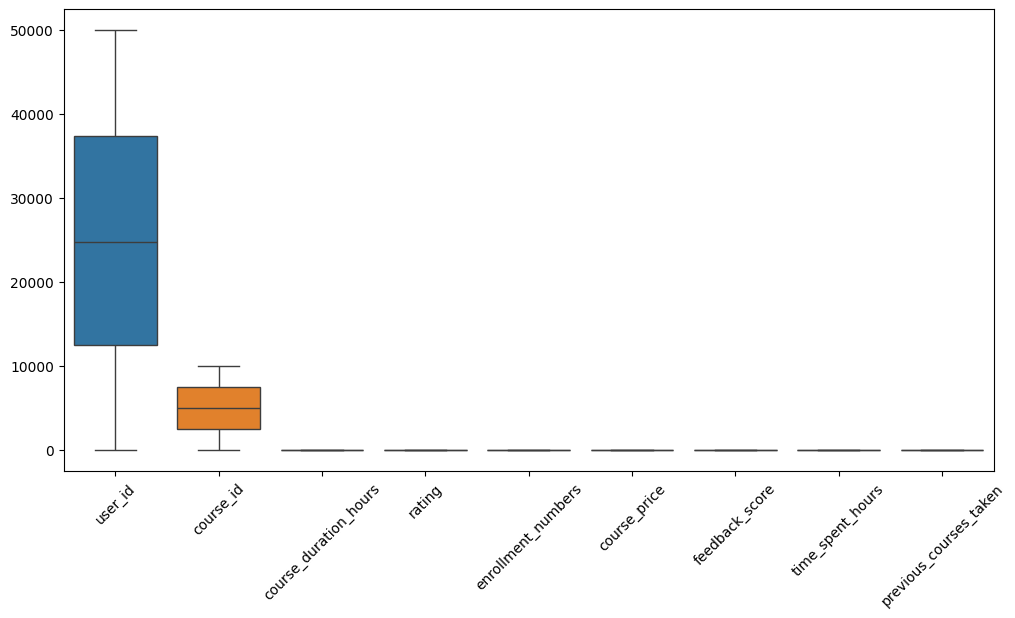

In [98]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Label Encoding</p>

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
df['certification_offered'] = df['certification_offered'].map({'Yes':1, 'No':0})
df['study_material_available'] = df['study_material_available'].map({'Yes':1, 'No':0})

# Ordinal encoding
difficulty_map = {'Beginner':0, 'Intermediate':1, 'Advanced':2}
df['difficulty_level'] = df['difficulty_level'].map(difficulty_map)

In [103]:
df.head(5)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952
1,861,1928,Cybersecurity for Professionals,Alexander Young,0.329474,NaN,NaN,4.3,0.267653,0.043729,0.770,NaN,0.471272,0.857143
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,0.088421,NaN,NaN,3.9,0.120225,0.751688,0.772,NaN,0.866723,0.380952
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,0.561053,NaN,NaN,3.1,0.675433,0.672500,0.969,NaN,0.358719,0.571429
4,11285,3361,Ethical Hacking Masterclass,Daniel White,0.271579,NaN,NaN,2.8,0.525216,0.752104,0.555,NaN,0.354002,0.476190


In [104]:
df[num_cols].corr()

,course_duration_hours,enrollment_numbers,course_price,time_spent_hours,previous_courses_taken
course_duration_hours,1.000000,-0.000256,0.002784,-0.001783,-0.001999
enrollment_numbers,-0.000256,1.000000,0.000325,0.000723,-0.000398
course_price,0.002784,0.000325,1.000000,-0.002828,0.000695
time_spent_hours,-0.001783,0.000723,-0.002828,1.000000,0.002987
previous_courses_taken,-0.001999,-0.000398,0.000695,0.002987,1.000000


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The features certificate_offered, difficulty_level and study_material_availble are categorical features, which are important for recommendation models for content based filtering, popularity etc.
* So we will apply the label binary label encoding for columns having Yes and No values
* And ordinal encoding for difficulty_level with 0 as beginner, 1 as intermidiate and 2 as advanced.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Feature Selection</p>

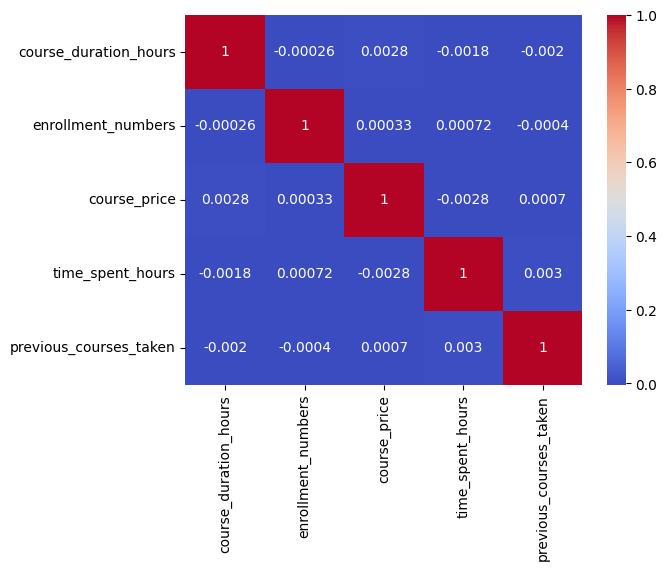

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The correlation heatmap shows the features are weekly correlated to each others.
* But for the recommendation system the features captures different aspects and every feature is important for checking the relationship with content based, beahaviour based or based on the popularity.
* Almost zero correlation with some features shows there is no redundancy or multicollinearity.
* So for recommendation system instead of removing features, keeping all features give good results in building the recommendation system model.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">MODEL BUILDING</p>
#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Collaborative Filtering (Course based) </p>


##### Item Based - with Distances and Cosine Similarty

In [106]:
pivot = pd.pivot_table(data=df, index = 'user_id', columns='course_id', values='rating', aggfunc= 'mean')

In [107]:
pivot

course_id,1,2,3,4,5,6,7,8,9,10,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
pivot.fillna(0, inplace=True)
pivot

course_id,1,2,3,4,5,6,7,8,9,10,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
pivot.isna().sum()

course_id
1       0
2       0
3       0
4       0
5       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 9998, dtype: int64

### Compare courses so transposing matrix

In [110]:
item_user_matrix = pivot.T

In [228]:
item_user_matrix

user_id,1,2,3,4,5,6,7,8,9,10,...,49989,49990,49991,49992,49994,49995,49996,49997,49998,49999
course_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculate distances and similarities

In [114]:
from scipy.sparse import csr_matrix
import joblib

# Convert to sparse
user_item_sparse = csr_matrix(item_user_matrix.values)

# Save sparse matrix
joblib.dump(user_item_sparse, "models/cf_user_item_sparse.joblib")

# Save index mappings separately
joblib.dump(item_user_matrix.index.tolist(), "models/cf_user_ids.joblib")
joblib.dump(item_user_matrix.columns.tolist(), "models/cf_item_ids.joblib")

print("✅ Sparse CF artifacts saved")


✅ Sparse CF artifacts saved


In [120]:
course_similarity = cosine_similarity(user_item_sparse)

### Pickle Files Collaborative Filtering

### Converting result into dataframe

In [121]:
similarity_df = pd.DataFrame(course_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

In [122]:
similarity_df

course_id,1,2,3,4,5,6,7,8,9,10,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
course_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Function for recommneding similar courses based on one course by etering one course id

In [123]:
#### Model - 1 : 

In [124]:
def recommend_similar_courses(course_id, n=5):
    if course_id not in similarity_df.index:
        return "Course not found!"

    similarity_scores = similarity_df[course_id].sort_values(ascending=False)
    return similarity_scores.iloc[1:n+1]

In [126]:
similar_courses = recommend_similar_courses(course_id=101, n=5)
similar_courses

course_id
3182    0.167859
4057    0.164104
495     0.159047
4607    0.120977
7473    0.119230
Name: 101, dtype: float64

### Converting to Dataframe

In [127]:
similar_course_df = similar_courses.reset_index()

In [128]:
similar_course_df.columns = ['course_id', 'similarity_score']

In [129]:
similar_course_df

,course_id,similarity_score
0,3182,0.167859
1,4057,0.164104
2,495,0.159047
3,4607,0.120977
4,7473,0.119230


In [130]:
df.head(1)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952


### Getting copy of original df data 

In [131]:
course_df1 = df.copy().drop_duplicates("course_id")

In [132]:
course_df1.head(3)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952
1,861,1928,Cybersecurity for Professionals,Alexander Young,0.329474,NaN,NaN,4.3,0.267653,0.043729,0.770,NaN,0.471272,0.857143
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,0.088421,NaN,NaN,3.9,0.120225,0.751688,0.772,NaN,0.866723,0.380952


### Merging Recommended records and origianl df

In [133]:
recommended_courses = similar_course_df.merge(
    course_df1,
    on="course_id",
    how="left"
)

In [134]:
df.iloc[[10]].sample(n=1)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
10,44132,6716,Graphic Design with Canva,Alexander Young,0.673684,NaN,NaN,4.5,0.063808,0.754229,1.0,NaN,0.40893,0.380952


In [135]:
recommended_courses

,course_id,similarity_score,user_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,3182,0.167859,30445,DevOps and Continuous Deployment,Ethan Hall,0.511579,NaN,NaN,4.7,0.034320,0.700729,0.948,NaN,0.448189,0.761905
1,4057,0.164104,2853,Mobile App Development with Swift,Benjamin Lewis,0.724211,NaN,NaN,3.0,0.647443,0.482479,0.594,NaN,0.279697,0.761905
2,495,0.159047,19556,Game Development with Unity,Liam Adams,0.093684,NaN,NaN,4.4,0.134134,0.283062,0.667,NaN,0.000000,0.571429
3,4607,0.120977,25052,Personal Finance and Wealth Building,Dr. Mia Walker,0.133684,NaN,NaN,5.0,0.618129,0.781854,0.595,NaN,0.535805,0.476190
4,7473,0.119230,38009,Networking and System Administration,Dr. John Smith,0.498947,NaN,NaN,3.9,0.146142,0.934208,0.807,NaN,0.003033,0.666667


## Recommending Courses for User

In [138]:
def recommend_course_to_user(user_id, n=5):
    user_ratings = pivot.loc[user_id]
    rated_courses = user_ratings[user_ratings > 0].index
    scores = pd.Series(dtype=float)

    for course in rated_courses:
        similar_courses = similarity_df[course]
        scores = scores.add(similar_courses, fill_value=0)

    scores = scores.drop(rated_courses)
    return scores.sort_values(ascending=False).head(n)

In [139]:
similar_users = recommend_course_to_user(user_id=10, n=5)

### Converting to Dataframe

In [140]:
similar_user_df = similar_users.reset_index()

In [141]:
similar_user_df.columns = ['course_id', 'similarity_score']

In [142]:
similar_user_df

,course_id,similarity_score
0,1343,0.200537
1,1120,0.190915
2,2886,0.177527
3,9205,0.168222
4,1761,0.161710


In [143]:
df.head(1)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952


### Getting copy of original df data 

In [144]:
course_df2 = df.copy().drop_duplicates("course_id")

In [145]:
course_df2.head(3)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952
1,861,1928,Cybersecurity for Professionals,Alexander Young,0.329474,NaN,NaN,4.3,0.267653,0.043729,0.770,NaN,0.471272,0.857143
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,0.088421,NaN,NaN,3.9,0.120225,0.751688,0.772,NaN,0.866723,0.380952


### Merging Recommended records and origianl df

In [146]:
recommended_user_courses = similar_user_df.merge(
    course_df2,
    on="course_id",
    how="left"
)

In [147]:
recommended_user_courses

,course_id,similarity_score,user_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,1343,0.200537,16965,Blockchain and Decentralized Applications,James Clark,0.873684,NaN,NaN,3.6,0.039318,0.860292,1.000,NaN,0.299073,0.095238
1,1120,0.190915,46704,Game Development with Unity,Emma Harris,0.351579,NaN,NaN,4.0,0.114831,0.831063,0.970,NaN,0.520303,0.190476
2,2886,0.177527,19800,Mobile App Development with Swift,Sophia Anderson,0.126316,NaN,NaN,3.0,0.412269,0.835187,0.996,NaN,0.000000,0.571429
3,9205,0.168222,606,Data Visualization with Tableau,Emma Harris,0.741053,NaN,NaN,3.5,0.552742,0.753000,0.935,NaN,0.258804,0.666667
4,1761,0.161710,33298,Advanced Machine Learning,James Clark,0.830526,NaN,NaN,3.0,0.398655,0.586396,0.565,NaN,0.032519,0.857143


In [281]:
## Collaborative Filtering Complete

### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">MODEL BUILDING</p>
#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Content based Filtering (Course based) </p>

In [282]:
### Selecting features for Content

In [150]:
df.head(2)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952
1,861,1928,Cybersecurity for Professionals,Alexander Young,0.329474,NaN,NaN,4.3,0.267653,0.043729,0.770,NaN,0.471272,0.857143


In [151]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken'],
      dtype='object')

In [152]:
df["content"] = (
    df["course_name"].astype(str)
   # df["instructor"].astype(str) + " " +
   # df["certification_offered"].astype(str) + " " +
   # df["difficulty_level"].astype(str) + " " +
   # df["study_material_available"].astype(str)
)

### Removing duplicates

In [153]:
course_content_df = df[["course_id", "content"]].drop_duplicates("course_id")

In [154]:
course_content_df.head(3)

,course_id,content
0,9366,Python for Beginners
1,1928,Cybersecurity for Professionals
2,9541,DevOps and Continuous Deployment


In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

tfidf_matrix = tfidf.fit_transform(course_content_df["content"])

In [156]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30009 stored elements and shape (9998, 58)>

### Pickle and Joblib Files

In [158]:
import joblib
import pickle
import os

os.makedirs("models", exist_ok=True)

# Save vectorizer (pickle is fine)
with open("models/cbf_tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save TF-IDF matrix (sparse → joblib)
joblib.dump(tfidf_matrix, "models/cbf_tfidf_matrix.joblib")

# Save item IDs (same order as TF-IDF matrix)
joblib.dump(df['course_id'].tolist(), "models/cbf_item_ids.joblib")

print("✅ Content-Based Filtering artifacts saved")


✅ Content-Based Filtering artifacts saved


### Course Similarity

In [159]:
content_similarity = cosine_similarity(tfidf_matrix)

In [160]:
content_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(9998, 9998))

In [161]:
content_similarity_df = pd.DataFrame(
    content_similarity,
    index=course_content_df["course_id"],
    columns=course_content_df["course_id"]
)

In [162]:
content_similarity_df

course_id,9366,1928,9541,3708,3361,8076,7887,2876,1578,4298,...,7560,7580,3014,964,90,1570,1629,4445,4004,5636
course_id,,,,,,,,,,,,,,,,,,,,,
9366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3708,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3361,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Recommending content based similar courses 

In [163]:
def recommended_content(course_id, n=5):
    if course_id not in content_similarity_df.index:
        return "Course not found"

    scores = content_similarity_df[course_id].sort_values(ascending=False)
    return scores.iloc[1:n+1]

In [164]:
recommend_content = recommended_content(course_id=101, n=5)

### Converting to Dataframe

In [165]:
recommended_content_df = recommend_content.reset_index()

In [166]:
recommended_content_df.columns = ['course_id', 'similarity_score']

In [167]:
recommended_content_df

,course_id,similarity_score
0,3026,1.0
1,5679,1.0
2,1716,1.0
3,8492,1.0
4,235,1.0


In [168]:
df.head(1)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952,Python for Beginners


### Getting copy of original df

In [169]:
course_df3 = df.copy().drop_duplicates("course_id")

In [170]:
course_df3.head(2)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952,Python for Beginners
1,861,1928,Cybersecurity for Professionals,Alexander Young,0.329474,NaN,NaN,4.3,0.267653,0.043729,0.770,NaN,0.471272,0.857143,Cybersecurity for Professionals


### Merging recommended content records with original df

In [171]:
recommended_contents_courses = recommended_content_df.merge(
    course_df3,
    on="course_id",
    how="left"
)

In [172]:
recommended_contents_courses

,course_id,similarity_score,user_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,3026,1.0,35196,Python for Beginners,David Wilson,0.033684,NaN,NaN,2.3,0.295614,0.082333,0.707,NaN,0.654086,0.761905,Python for Beginners
1,5679,1.0,22521,Python for Beginners,Isabella Scott,0.722105,NaN,NaN,3.6,0.610297,0.832021,0.842,NaN,0.156698,0.476190,Python for Beginners
2,1716,1.0,26476,Python for Beginners,Dr. John Smith,0.334737,NaN,NaN,3.8,0.483521,0.695563,0.693,NaN,0.058804,0.571429,Python for Beginners
3,8492,1.0,9517,Python for Beginners,Prof. Emily Johnson,0.751579,NaN,NaN,3.2,0.276893,0.104354,0.538,NaN,0.491154,0.571429,Python for Beginners
4,235,1.0,47328,Python for Beginners,Dr. Robert Davis,0.212632,NaN,NaN,4.3,0.191525,0.590104,0.862,NaN,0.000000,0.761905,Python for Beginners


### Content based Filtering (User based)

Building user profile from courses user interacted with.

In [173]:
def recommend_content_for_user(user_id, n=5):
    user_courses = df[df["user_id"] == user_id]["course_id"].unique()

    user_profile = similarity_df.loc[user_courses].mean()
    user_profile = user_profile.drop(user_courses)

    return user_profile.sort_values(ascending=False).head(n)

In [174]:
recommend_content_user = recommend_content_for_user(user_id=123, n=5)

### Converting to Dataframe

In [175]:
recommended_content_user_df = recommend_content_user.reset_index()

In [176]:
recommended_content_user_df.columns = ['course_id', 'similarity_score']

In [177]:
recommended_content_user_df

,course_id,similarity_score
0,5157,0.127667
1,6313,0.125680
2,5861,0.117760
3,5273,0.117659
4,6849,0.112200


In [178]:
df.head(1)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952,Python for Beginners


### Getting copy of original df

In [179]:
course_df4 = df.copy().drop_duplicates("course_id")

In [180]:
course_df4.head(2)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952,Python for Beginners
1,861,1928,Cybersecurity for Professionals,Alexander Young,0.329474,NaN,NaN,4.3,0.267653,0.043729,0.770,NaN,0.471272,0.857143,Cybersecurity for Professionals


### Merging recommended content records with original df

In [181]:
recommended_contents_user = recommended_content_user_df.merge(
    course_df4,
    on="course_id",
    how="left"
)

In [182]:
recommended_contents_user

,course_id,similarity_score,user_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,5157,0.127667,34442,Blockchain and Decentralized Applications,Jessica Martinez,0.309474,NaN,NaN,4.5,0.544147,0.182083,0.621,NaN,0.218197,0.571429,Blockchain and Decentralized Applications
1,6313,0.125680,17062,DevOps and Continuous Deployment,Daniel White,0.283158,NaN,NaN,3.5,0.230703,0.968812,1.000,NaN,0.260320,0.761905,DevOps and Continuous Deployment
2,5861,0.117760,30524,Public Speaking Mastery,Sophia Anderson,0.975789,NaN,NaN,3.5,0.679166,0.841271,0.800,NaN,0.207582,0.571429,Public Speaking Mastery
3,5273,0.117659,31116,Cybersecurity for Professionals,Dr. Robert Davis,0.246316,NaN,NaN,4.1,0.344199,0.276021,1.000,NaN,0.084751,0.571429,Cybersecurity for Professionals
4,6849,0.112200,45422,Data Visualization with Tableau,Isabella Scott,0.209474,NaN,NaN,3.8,0.110718,0.782271,0.810,NaN,0.395282,0.190476,Data Visualization with Tableau


## Hybrid Approach (Collaborative + Content Based)`

In [242]:
item_ids = item_user_matrix.index.tolist()

In [269]:
import joblib
import pickle
import os

os.makedirs("models", exist_ok=True)

In [270]:
joblib.dump(
    item_user_matrix,
    "models/cf_item_user_matrix.joblib"
)

['models/cf_item_user_matrix.joblib']

In [271]:
joblib.dump(
    tfidf_matrix,
    "models/cbf_tfidf_matrix.joblib"
)

['models/cbf_tfidf_matrix.joblib']

In [273]:
with open("models/item_ids.pkl", "wb") as f:
    pickle.dump(item_ids, f)

In [274]:
hybrid_config = {
    "alpha": 0.7,
    "model_type": "cf + cbf hybrid"
}

with open("models/hybrid_config.pkl", "wb") as f:
    pickle.dump(hybrid_config, f)


In [244]:
def get_cf_scores(course_id, item_user_matrix, item_ids):

    if course_id not in item_ids:
        raise ValueError("course_id not found in item_ids")

    idx = item_ids.index(course_id)

    # shape: (1, n_users)
    item_vector = item_user_matrix.iloc[idx].to_numpy().reshape(1, -1)

    # shape result: (1, n_items)
    sim = cosine_similarity(
        item_vector,
        item_user_matrix.to_numpy()
    ).flatten()

    # ✅ index must be items (9998)
    return pd.Series(sim, index=item_ids)

In [245]:
def get_cbf_scores(course_id, tfidf_matrix, item_ids):
    if course_id not in item_ids:
        raise ValueError("course_id not found in item_ids")

    idx = item_ids.index(course_id)

    item_vector = tfidf_matrix[idx].reshape(1, -1)

    sim = cosine_similarity(
        item_vector,
        tfidf_matrix
    ).flatten()

    return pd.Series(sim, index=item_ids)

In [246]:
def hybrid_recommendation_system(
    course_id,
    item_user_matrix,
    tfidf_matrix,
    item_ids,
    n=5,
    alpha=0.7
):
    cf_scores = get_cf_scores(course_id, item_user_matrix, item_ids)
    cbf_scores = get_cbf_scores(course_id, tfidf_matrix, item_ids)

    hybrid_scores = alpha * cf_scores + (1 - alpha) * cbf_scores

    hybrid_scores = hybrid_scores.drop(course_id)

    return hybrid_scores.sort_values(ascending=False).head(n)

In [247]:
hybrid_recommendation = hybrid_recommendation_system(
    course_id=101,
    item_user_matrix=item_user_matrix,
    tfidf_matrix=tfidf_matrix,
    item_ids=item_ids,
    n=5,
    alpha=0.7
)

In [248]:
hybrid_recommendation

5765    0.370299
4726    0.338260
2097    0.300000
4327    0.300000
1579    0.300000
dtype: float64

In [249]:
user_item_sparse.shape

(9998, 43242)

### Converting to Dataframe

In [250]:
hybrid_recommended_df = hybrid_recommendation.reset_index()

In [251]:
hybrid_recommended_df.columns = ['course_id', 'similarity_score']

In [252]:
hybrid_recommended_df

,course_id,similarity_score
0,5765,0.370299
1,4726,0.338260
2,2097,0.300000
3,4327,0.300000
4,1579,0.300000


In [253]:
df.head(1)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952,Python for Beginners


### Getting copy of original df

In [254]:
course_df5 = df.copy().drop_duplicates("course_id")

In [255]:
course_df5.head(2)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,15796,9366,Python for Beginners,Emma Harris,0.358947,NaN,NaN,5.0,0.358681,0.619792,0.797,NaN,0.279697,0.380952,Python for Beginners
1,861,1928,Cybersecurity for Professionals,Alexander Young,0.329474,NaN,NaN,4.3,0.267653,0.043729,0.770,NaN,0.471272,0.857143,Cybersecurity for Professionals


### Merging recommended hybrid records with original df

In [256]:
hybrid_recommended_courses = hybrid_recommended_df.merge(
    course_df5,
    on="course_id",
    how="left"
)

In [266]:
hybrid_recommended_courses

,course_id,similarity_score,user_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,content
0,5765,0.370299,13122,DevOps and Continuous Deployment,Ethan Hall,0.126316,NaN,NaN,2.7,0.637036,0.599521,0.723,NaN,0.736142,0.476190,DevOps and Continuous Deployment
1,4726,0.338260,16219,Public Speaking Mastery,William Thomas,0.530526,NaN,NaN,2.6,0.117932,0.990292,0.725,NaN,0.403201,0.380952,Public Speaking Mastery
2,2097,0.300000,35423,Ethical Hacking Masterclass,Charlotte King,0.083158,NaN,NaN,2.0,0.186520,0.480354,0.775,NaN,0.464027,0.666667,Ethical Hacking Masterclass
3,4327,0.300000,49359,Graphic Design with Canva,Michael Brown,0.500000,NaN,NaN,4.7,0.374004,0.743188,0.625,NaN,0.475147,0.476190,Graphic Design with Canva
4,1579,0.300000,23801,Photography and Video Editing,Charlotte King,0.752632,NaN,NaN,4.0,0.177827,0.022729,0.815,NaN,0.813648,0.190476,Photography and Video Editing


In [268]:
# end